# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)

<ipython-input-5-7d30c1d1d44e>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [7]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [15]:
#Q2
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.concat([missing_values, missing_percent], axis=1, keys=['결측치 수', '결측치 비율(%)'])
missing_df.sort_values(by='결측치 수', ascending=False, inplace=True)
missing_df = missing_df[missing_df['결측치 수'] > 0]

print(missing_df)

                             결측치 수  결측치 비율(%)
jurisdiction_names           50781  99.970470
license                      50759  99.927160
square_feet                  50407  99.234192
monthly_price                46119  90.792582
weekly_price                 45411  89.398772
host_response_rate           19006  37.416332
host_response_time           19006  37.416332
security_deposit             17325  34.107016
host_acceptance_rate         14015  27.590755
review_scores_value          11482  22.604142
review_scores_location       11482  22.604142
review_scores_checkin        11479  22.598236
review_scores_accuracy       11466  22.572644
review_scores_communication  11463  22.566738
review_scores_cleanliness    11452  22.545082
review_scores_rating         11431  22.503740
reviews_per_month            10453  20.578392
beds                           482   0.948894
bedrooms                        77   0.151587
bathrooms                       54   0.106308
host_listings_count              5

- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 52972 (\N{HANGUL SYLLABLE KEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from current font.
  plt.tight_layout()
<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  plt.tight_layout()
<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  plt.tight_layout()
<ipython-input-14-7ea9252a6bfe>:8: UserWarning: Glyph 48708

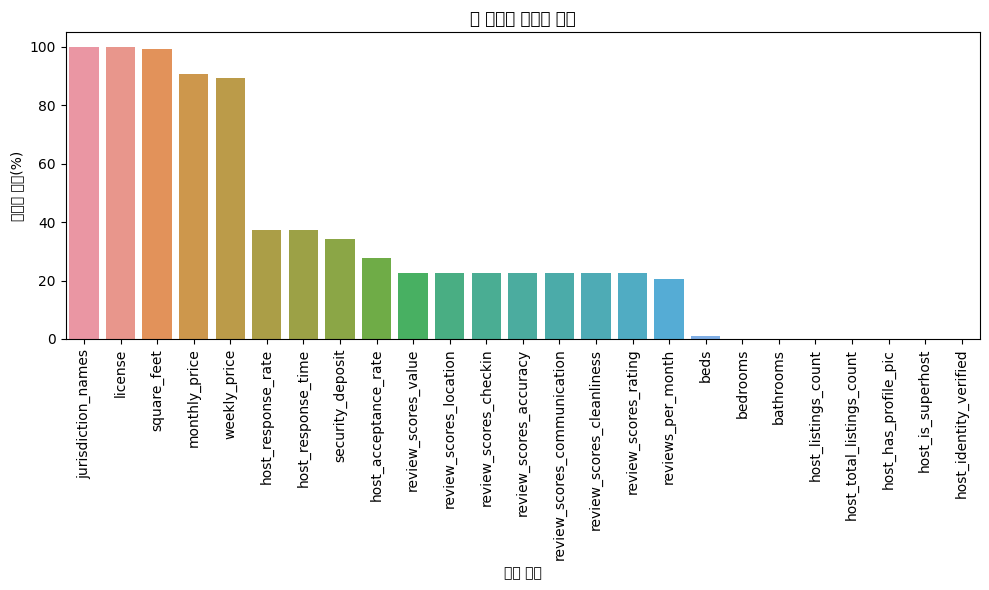

In [14]:
# Q3
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y='결측치 비율(%)', data=missing_df)
plt.xticks(rotation=90)
plt.xlabel('컬럼 이름')
plt.ylabel('결측치 비율(%)')
plt.title('각 컬럼의 결측치 비율')
plt.tight_layout()
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [17]:
# Q4
beds_missing_data = df[df['beds'].isnull()]
beds_missing_data.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [18]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [19]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 개수에 대한 그래프를 그려주세요.

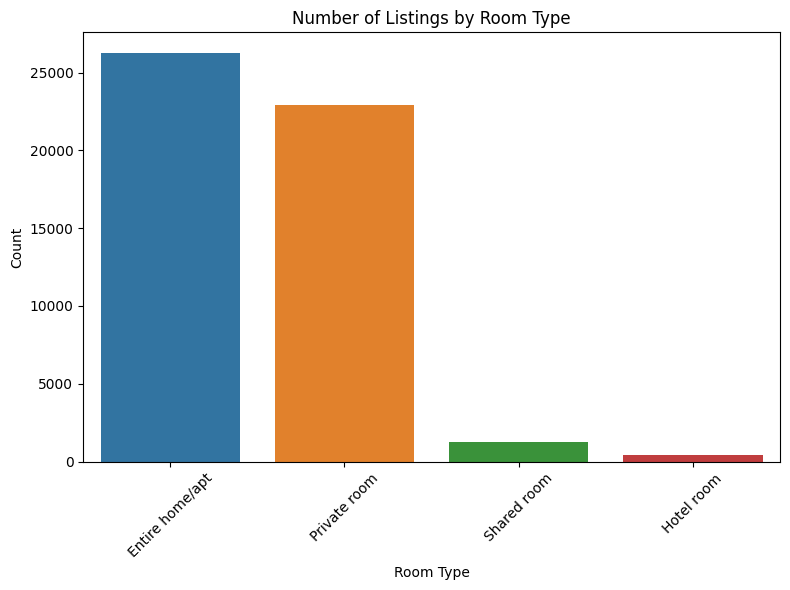

In [21]:
# Q5
room_type_counts = df['room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='count', data=room_type_counts)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 개수가 아닌 비율을 나타내도록 재구성해보세요.

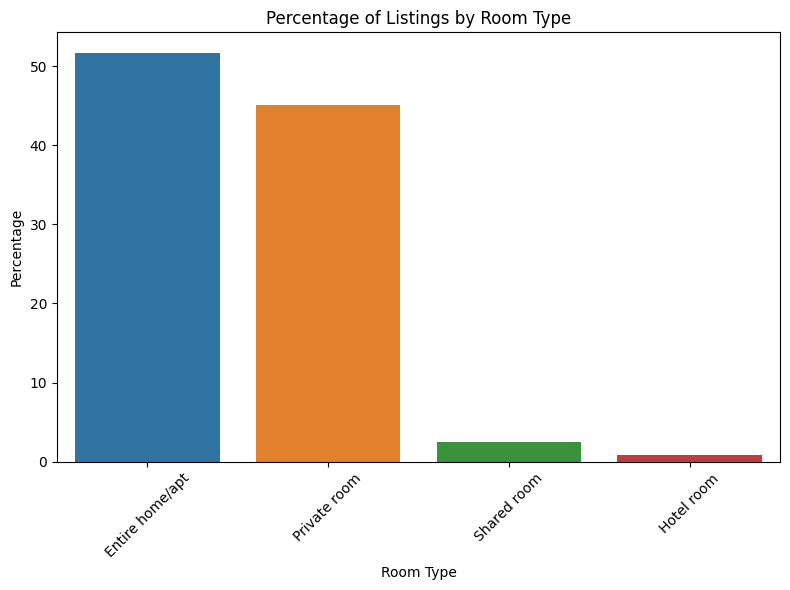

In [22]:
# Q6
total_listings = len(df)
room_type_counts['ratio'] = room_type_counts['count'] / total_listings * 100

plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='ratio', data=room_type_counts)
plt.xlabel('Room Type')
plt.ylabel('Percentage')
plt.title('Percentage of Listings by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 개수가 어땠는지 보여주세요.    

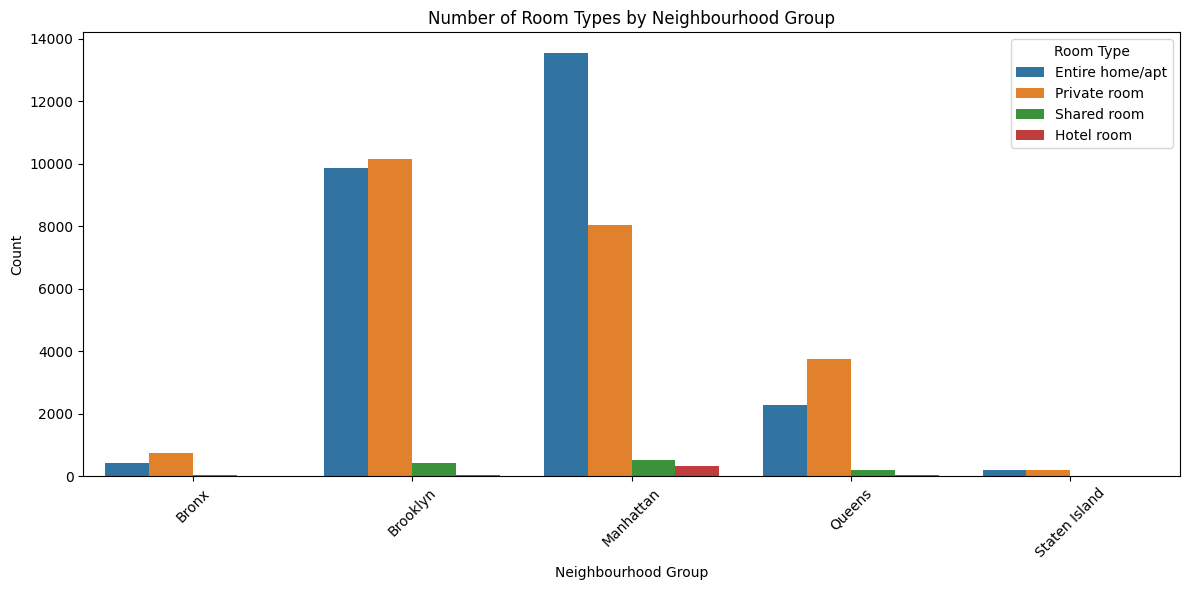

In [25]:
# Q7
room_type_counts = df.groupby(['neighborhood', 'room_type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='neighborhood', y='count', hue='room_type', data=room_type_counts)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Number of Room Types by Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Room Type', loc='upper right')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

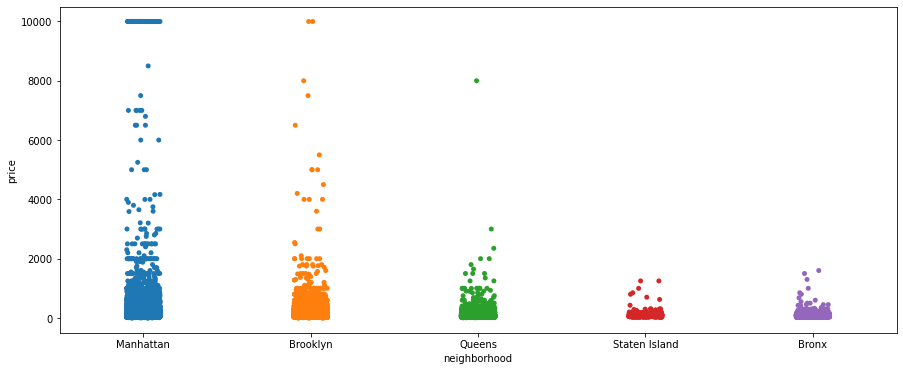

In [ ]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요


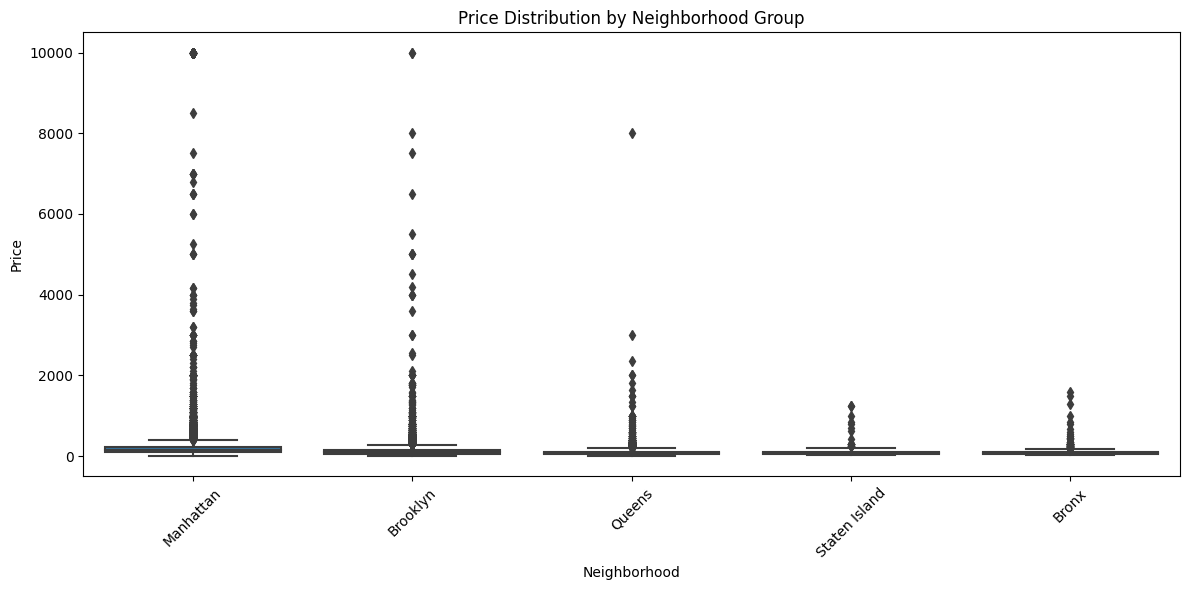

In [28]:
# Q8
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighborhood', y='price', data=df)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

# Q9
Manhattan, Brooklyn, Queens, Bronx, Staten Island 순으로 박스 바깥쪽으로 많이 벗어나는 이상치가 많으며, 이는 해당 지역 가격 분포에 불균등한 경향을 보임을 확인할 수 있다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

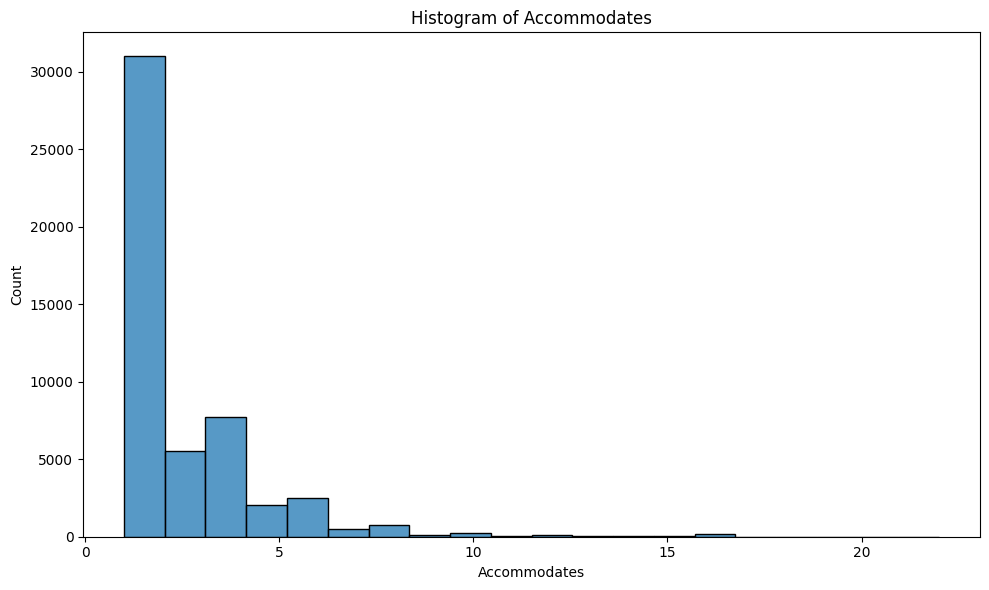

In [31]:
# Q10
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='accommodates', bins=20, kde=False)
plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.title('Histogram of Accommodates')
plt.tight_layout()

plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

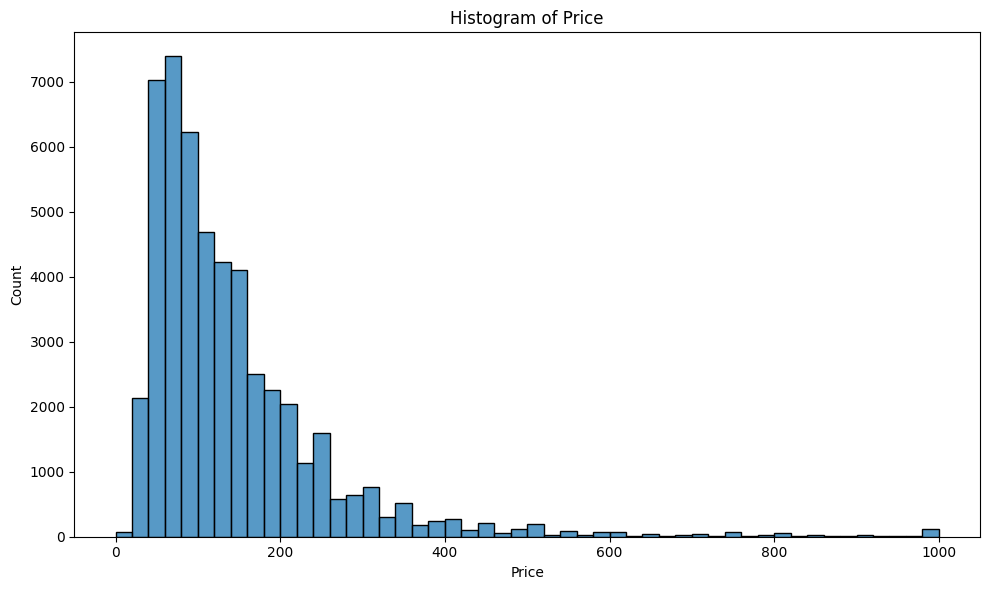

In [34]:
# Q11
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['price'].between(0, 1000)], x='price', bins=50, kde=False)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Price')
plt.tight_layout()

plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [36]:
df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)

<ipython-input-36-7d30c1d1d44e>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [40]:
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_25plus = missing_percent[missing_percent >= 25]
df.drop(columns=missing_25plus.index, inplace=True)
missing_10to25 = missing_percent[(missing_percent >= 10) & (missing_percent < 25)]
df.dropna(axis=0, subset=missing_10to25.index, inplace=True)

missing_numeric = missing_percent[missing_percent < 10]
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    if column in missing_numeric.index:
        median_val = df[column].median()
        df[column].fillna(median_val, inplace=True)

# 결측치가 10% 미만인 object type column들에 대해 최빈값으로 대체
missing_object = missing_percent[(missing_percent < 10) & (missing_percent > 0)]
object_columns = df.select_dtypes(include='object').columns
for column in object_columns:
    if column in missing_object.index:
        mode_val = df[column].mode().iloc[0]
        df[column].fillna(mode_val, inplace=True)

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


1. has_reviews의 이진 특성을 생성, 숙소 리뷰 여부(Nan이면 0)를 나타내 타깃 변수에 미치는 영향을 확인한다.

In [49]:
#Q13-1)
df['has_reviews'] = df['reviews_per_month'].apply(lambda x: 0 if pd.isnull(x) else 1)
print(df['has_reviews'])

1        1
2        1
3        1
4        1
5        1
        ..
50490    1
50526    1
50598    1
50650    1
50694    1
Name: has_reviews, Length: 39291, dtype: int64

2. short_stay 이진 특성을 생성, minimum_nights의 크기를 지정해 숙소의 단기 체류 여부를 통해 숙소를 구분한다.

In [50]:
#Q13-2)
df['short_stay'] = df['minimum_nights'].apply(lambda x: 1 if x <= 3 else 0)
print(df['short_stay'])

1        0
2        1
3        1
4        1
5        0
        ..
50490    1
50526    1
50598    1
50650    0
50694    1
Name: short_stay, Length: 39291, dtype: int64


3. high_demand_area 이진 특성을 생성해 수요가 높은 Manhattan과 Brooklyn에 해당하는지 확인한다.

In [46]:
#Q13-3)
high_demand_areas = ['Manhattan', 'Brooklyn']
df['high_demand_area'] = df['neighborhood'].apply(lambda x: 1 if x in high_demand_areas else 0)
print(df['high_demand_area'])

1        1
2        1
3        1
4        1
5        1
        ..
50490    0
50526    1
50598    1
50650    1
50694    1
Name: high_demand_area, Length: 39291, dtype: int64


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
